# Аналитика в авиакомпании

### Описание проекта
Вы аналитик компании «F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. Важно понять предпочтения пользователей, покупающих билеты на те или иные направления.
Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.

---

### <a id="stepend"> Оглавление</a>

- [Импорт библиотек, данных и получение первичной информации](#step1)
- [Предобработка данных](#step2)
- [Исследовательский анализ данных](#step3)
- [Общий вывод](#step4)

---

### План исследования
- Изменить типы данных там, где необходимо.

---

- Определить топ-10 городов по количеству рейсов;
- Построить графики для следующих показателей: модель самолета и количество рейсов, город и количество рейсов, топ-10 городов по количеству рейсов;.
- Проанализировать графики и написать по каждому вывод.

---

- Написать общий вывод.

### <a id='step1'>Импорт библиотек, данных и получение первичной информации</a>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# имортируем результат первого запроса
query1 = pd.read_csv('')

In [3]:
# первичное представление
query1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [4]:
# первые 5 строк
query1.head()

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300


In [5]:
# уникальные значения
for column in query1.columns:
    print(query1[column].value_counts())

Airbus A321-200        1
Sukhoi SuperJet-100    1
Cessna 208 Caravan     1
Boeing 767-300         1
Boeing 777-300         1
Boeing 737-300         1
Bombardier CRJ-200     1
Airbus A319-100        1
Name: model, dtype: int64
607     1
4446    1
4557    1
300     1
4185    1
600     1
630     1
960     1
Name: flights_amount, dtype: int64


In [6]:
# проверим на пропуски
query1.isna().sum()

model             0
flights_amount    0
dtype: int64

In [7]:
# проверим на дубликаты
query1.duplicated().sum()

0

In [8]:
# имортируем результат второго запроса
query2 = pd.read_csv('')

In [9]:
# первичное представление
query2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [10]:
# первые 5 строк
query2.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [11]:
# уникальные значения
for column in query2.columns:
    print(query2[column].value_counts())

Грозный        1
Владикавказ    1
Тюмень         1
Салехард       1
Самара         1
              ..
Нефтеюганск    1
Белгород       1
Астрахань      1
Челябинск      1
Краснодар      1
Name: city, Length: 101, dtype: int64
1.000000      12
2.000000       9
3.000000       7
4.000000       4
2.290323       3
2.612903       2
3.290323       2
6.000000       2
5.000000       2
4.290323       2
5.870968       2
3.419355       2
6.032258       2
2.580645       2
6.290323       2
2.161290       2
3.870968       1
17.322581      1
1.580645       1
8.419355       1
4.129032       1
1.357143       1
4.580645       1
5.129032       1
2.451613       1
31.161290      1
6.709677       1
1.294118       1
4.193548       1
9.000000       1
9.612903       1
3.161290       1
8.741935       1
10.000000      1
129.774194     1
6.548387       1
1.548387       1
7.741935       1
3.903226       1
3.129032       1
1.590909       1
6.967742       1
1.322581       1
1.129032       1
9.580645       1
2.870968  

In [12]:
# проверим на пропуски
query2.isna().sum()

city               0
average_flights    0
dtype: int64

In [13]:
# проверим на дубликаты
query2.duplicated().sum()

0

#### Вывод

#### Датасет query1

#### Наименования столбцов

- model - модель самолета;
- flights_amount - количество рейсов для каждой модели самолета.

---

#### Датасет query2

#### Наименование столбцов

- city - город;
- average_flights - среднее количество рейсов для каждого города.

--- 

#### Обнаруженные проблемы
- Тип данных в столбце average_flights привести к целочисленному.

---

#### На этапе предобработки необходимо
- Тип данных в столбце average_flights привести к целочисленному.

### <a id='step2'>Предобработка данных</a>

In [14]:
sns.set_theme(style="whitegrid")

In [15]:
# приведем столбец average_flights к целочисленному типу
query2['average_flights'] = query2['average_flights'].astype('int')

In [16]:
# проверим
query2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   city             101 non-null    object
 1   average_flights  101 non-null    int32 
dtypes: int32(1), object(1)
memory usage: 1.3+ KB


### <a id='step3'>Исследовательский анализ данных</a>

In [17]:
# найдем топ-10 городов по количеству рейсов
top10_city = query2.sort_values(by='average_flights', ascending=False).head(10)

In [18]:
# выведем
top10_city.head(10)

,city,average_flights
43,Москва,129
70,Санкт-Петербург,31
54,Новосибирск,17
20,Екатеринбург,11
33,Красноярск,11
63,Пермь,10
67,Ростов-на-Дону,10
10,Брянск,10
84,Ульяновск,9
73,Советский,9


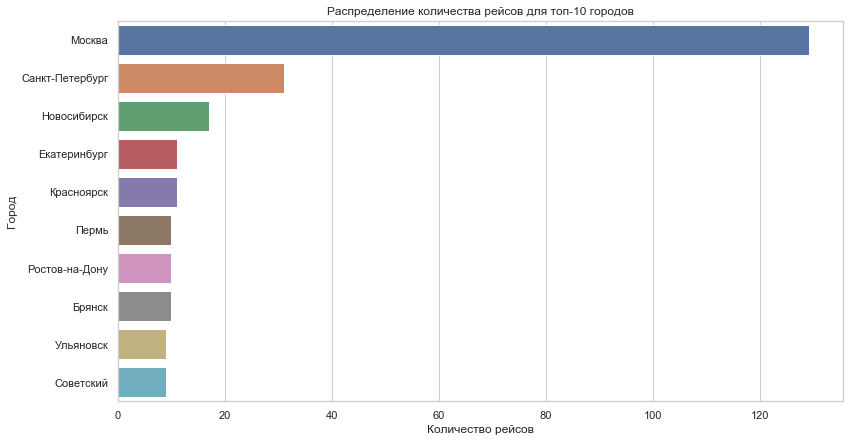

In [19]:
# нарисуем график для топ-10 городов по количеству рейсов
plt.figure(figsize=(13, 7))
ax = sns.barplot(x='average_flights', y='city', data=top10_city.sort_values('average_flights', ascending=False))
plt.title('Распределение количества рейсов для топ-10 городов')
plt.xlabel('Количество рейсов')
plt.ylabel('Город')
plt.show();

- Москва и Санкт-Петербург являются лидерами по среднему количеству рейсов в день - 129 и 31 рейс;
- Остальные города распределены равномерно между собой.

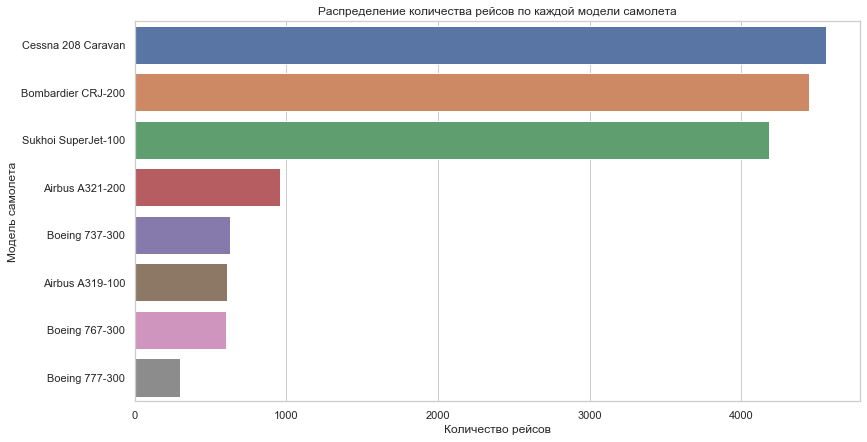

In [20]:
# нарисуем график количества рейсов для каждой модели самолета
plt.figure(figsize=(13, 7))
ax = sns.barplot(x='flights_amount', y='model', data=query1.sort_values('flights_amount', ascending=False))
plt.title('Распределение количества рейсов по каждой модели самолета')
plt.xlabel('Количество рейсов')
plt.ylabel('Модель самолета')
plt.show();

- Больше всего рейсов совершается на моделях Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100;
- Количество рейсов на остальных моделях распределено равномерно. Количество рейсов на каждой модели не превышает и одной тысячи рейсов.

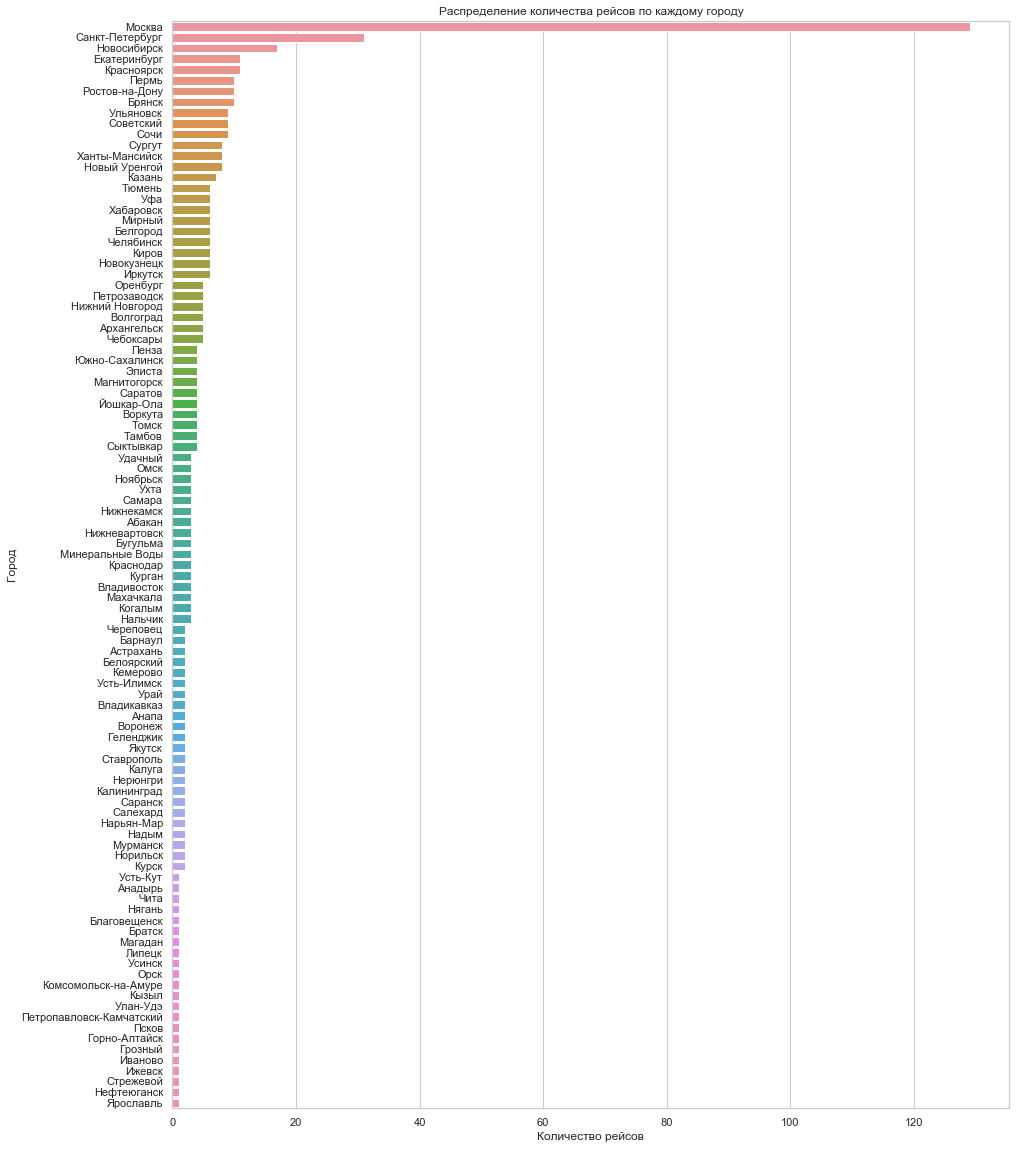

In [21]:
# нарисуем график среднего количества рейсов для каждого города
plt.figure(figsize=(15, 20))
ax = sns.barplot(x='average_flights', y='city', data=query2.sort_values('average_flights', ascending=False))
plt.title('Распределение количества рейсов по каждому городу')
plt.xlabel('Количество рейсов')
plt.ylabel('Город')
plt.show();

- Москва и Санкт-Петербург абсолютные лидеру по дневному количеству рейсов - 129 и 31 рейс;
- Остальные города распределены между собой равномерно и не добирают до 20 рейсов в день.

### <a id='step4'>Общий вывод</a>

#### Топ-10 городов по количеству рейсов
- Москва - 129 рейсов;
- Санкт-Петербург - 31 рейс;
- Новосибирск - 17 рейсов;
- Екатеринбург - 11 рейсов;
- Красноярск - 11 рейсов;
- Пермь - 10 рейсов;
- Ростов-на-Дону - 10 рейсов;
- Брянск - 10 рейсов;
- Ульяновск - 9 рейсов;
- Советский - 9 рейсов. 

---

- Наиболее популярные модели самолетов: Bombardier CRJ-200, Cessna 208 Caravan и Sukhoi SuperJet-100;
- Москва и Санкт-Петербург являются лидерами по дневному количеству рейсов. Это может быть обусловлено тем, что в этих городах наиболее сильно развито турустическое сообщение + международное. Также эти города являются трансферами для международных сообщений.Если рассматривать в контексте музыкальных фестивалей, то опять-таки, в этих городах проводится больше мероприятий, чем в остальных.